In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from glob import glob
import os

In [68]:
# Read our results

data = dict()

results_csvs = glob(os.path.join(os.pardir, "results", "*.csv"))
for file_path in results_csvs:
    df = pd.read_csv(file_path)
    file_name = file_path.split("/")[-1]
    instance_name = file_name.split("_")[0]
    # Drop the cvs extension
    method_name = file_name.split("_")[-1][:-4]
    if instance_name not in data.keys():
        data[instance_name] = dict()
    data[instance_name][method_name] = df
data

{'had20.dat': {'greedy':    run                                           solution  evaluation  \
  0    0  [2, 19, 6, 1, 9, 17, 11, 4, 5, 18, 0, 16, 12, ...        7086   
  1    1  [12, 4, 1, 10, 11, 5, 6, 17, 2, 13, 18, 0, 8, ...        6968   
  2    2  [7, 5, 0, 13, 18, 11, 6, 17, 14, 10, 9, 4, 2, ...        6944   
  3    3  [7, 14, 18, 13, 5, 6, 17, 9, 0, 11, 10, 4, 2, ...        6930   
  4    4  [8, 0, 18, 17, 6, 13, 11, 10, 15, 5, 9, 4, 2, ...        7036   
  5    5  [14, 15, 18, 5, 13, 6, 11, 9, 0, 10, 16, 19, 4...        7020   
  6    6  [19, 6, 9, 16, 11, 10, 18, 17, 1, 4, 0, 8, 3, ...        7090   
  7    7  [2, 9, 4, 17, 11, 10, 6, 13, 1, 5, 18, 0, 15, ...        6980   
  8    8  [7, 14, 0, 13, 18, 5, 6, 9, 15, 11, 4, 10, 16,...        6936   
  9    9  [19, 16, 1, 10, 9, 11, 13, 6, 4, 18, 17, 0, 15...        6992   
  
     iterations  time  
  0           0     6  
  1           0     9  
  2           0     8  
  3           0     5  
  4           0     6  
  5  

In [69]:
# Read solutions
data_path = os.path.join(os.pardir, "data", "qapdatsol")
for instance in data.keys():
    solution_file = instance[:-3] + "sln"
    print(solution_file)
    full_path = os.path.join(data_path, solution_file)

    f = open(full_path, "r")
    first_line = f.readline().strip().split(" ")
    n, opt = int(first_line[0]), float(first_line[-1])
    data[instance]["n"] = n
    data[instance]["opt"] = opt
    opt_sol = []
    while True:
        line = f.readline()
        if not line:
            break
        elements = [ele for ele in line.strip().split(" ") if len(ele) > 0]
        # Additional comma split if necessary
        if len(elements) == 1:
            elements = elements[0].split(",")
        elements = list(map(int, elements))
        opt_sol.extend(elements)
    f.close()

had20.sln
nug30.sln
nug15.sln
esc128.sln
els19.sln
tai60a.sln
bur26c.sln
wil100.sln


In [70]:
# Sort instances by size
data = dict(sorted(data.items(), key=lambda tup: tup[1]["n"], reverse=True))

In [71]:
for instance in data.keys():
    print(instance, data[instance].keys())

esc128.dat dict_keys(['walk', 'heuristic', 'steepest', 'random-walk', 'greedy', 'random', 'n', 'opt'])
wil100.dat dict_keys(['heuristic', 'steepest', 'walk', 'random', 'greedy', 'random-walk', 'n', 'opt'])
tai60a.dat dict_keys(['steepest', 'random-walk', 'heuristic', 'random', 'greedy', 'walk', 'n', 'opt'])
nug30.dat dict_keys(['random-walk', 'random', 'steepest', 'greedy', 'walk', 'heuristic', 'n', 'opt'])
bur26c.dat dict_keys(['random-walk', 'heuristic', 'random', 'greedy', 'walk', 'steepest', 'n', 'opt'])
had20.dat dict_keys(['greedy', 'walk', 'heuristic', 'random', 'random-walk', 'steepest', 'n', 'opt'])
els19.dat dict_keys(['walk', 'greedy', 'random-walk', 'heuristic', 'steepest', 'random', 'n', 'opt'])
nug15.dat dict_keys(['steepest', 'walk', 'heuristic', 'random-walk', 'random', 'greedy', 'n', 'opt'])


In [72]:
import matplotlib
import seaborn as sns
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
cmap = matplotlib.colormaps["tab10"]

In [73]:
list(data.keys())

['esc128.dat',
 'wil100.dat',
 'tai60a.dat',
 'nug30.dat',
 'bur26c.dat',
 'had20.dat',
 'els19.dat',
 'nug15.dat']

In [75]:
# Common for plots
instance_sizes = [data[instance]["n"] for instance in data.keys()]
methods = ['random-walk', 'heuristic', 'random', 'greedy', 'steepest']

# Quality

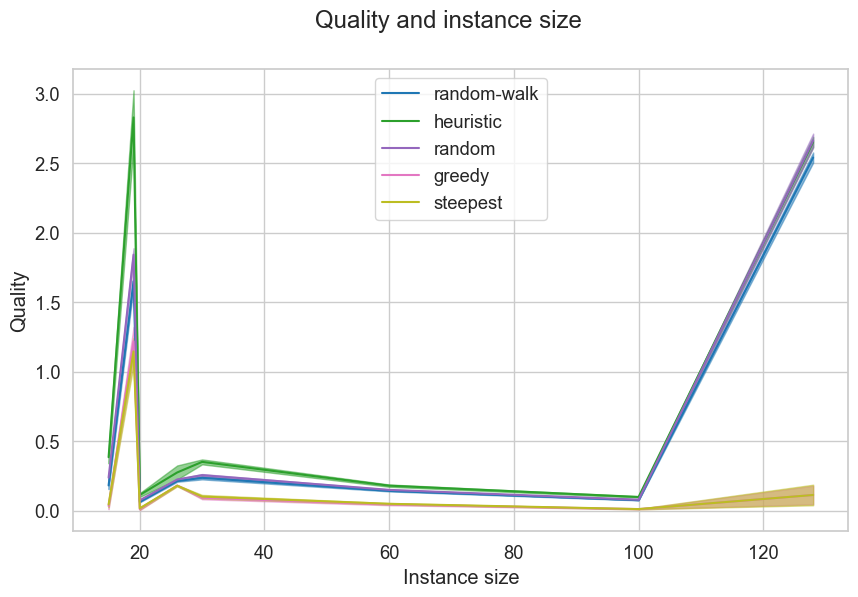

In [79]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    means = []
    variations = []
    for instance in data.keys():
        instance_mean = data[instance][method]["evaluation"].mean()
        # Coefficient of vatioation is std/mean
        coeff_of_variation = data[instance][method]["evaluation"].std() / instance_mean
        diff = (instance_mean - data[instance]["opt"])/data[instance]["opt"]
        means.append(diff)
        variations.append(coeff_of_variation)
    means = np.array(means)
    variations = np.array(variations)
    color = color=cmap(float(i/len(methods)))
    ax.plot(instance_sizes, means, label = method, color=color)
    ax.fill_between(instance_sizes, means - variations,
                    means + variations,
                    color=color, alpha=0.5)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Quality")

fig.suptitle("Quality and instance size")
plt.legend()
plt.show()

# Running Time

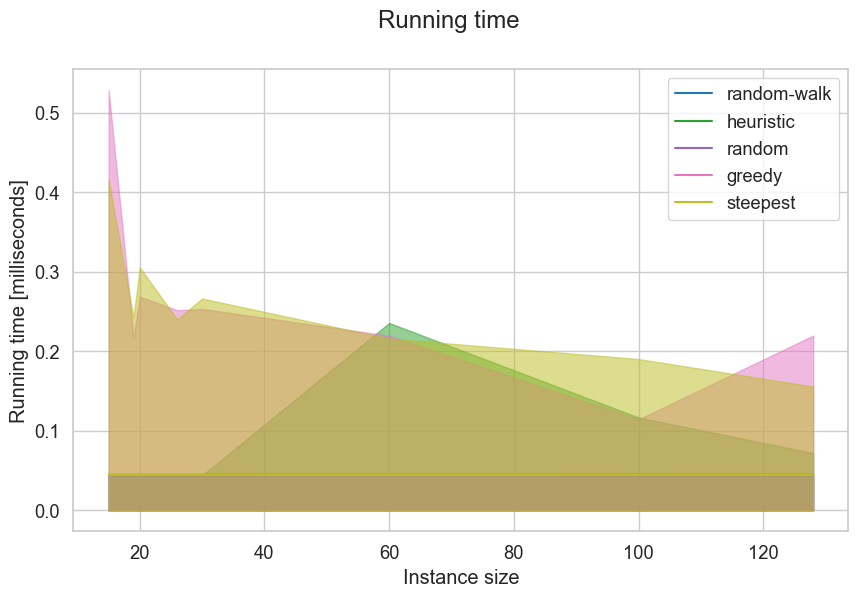

In [84]:
fig, ax = plt.subplots(figsize = (10,6))

for i, method in enumerate(methods):
    means = []
    variations = []
    for instance in data.keys():
        instance_mean = data[instance][method]["time"].mean()
        # Coefficient of vatioation is std/mean
        coeff_of_variation = data[instance][method]["time"].std() / (instance_mean + 1e-5)
        means.append(diff)
        variations.append(coeff_of_variation)
    means = np.array(means)
    variations = np.array(variations)
    color = color=cmap(float(i/len(methods)))
    ax.plot(instance_sizes, means, label = method, color=color)
    ax.fill_between(instance_sizes, 0,
                    means + variations,
                    color=color, alpha=0.5)
    ax.set_xlabel("Instance size")
    ax.set_ylabel("Running time [milliseconds]")

fig.suptitle("Running time")
plt.legend()
plt.show()